# 6.1.2 확률적 경사 하강법(SGD)
---

In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[keys]

# 6.1.4 모멘텀
---

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

# 6.1.5 AdaGrad
---

In [1]:
class AdaGrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += gards[key] * gards[key]
            params[key] -= self.lr * grads[key]/(np.sqrt(self.h[key])+1e-7)

# 6.2 가중치의 초깃값
---

### 6.2.2 은닉층의 활성화값 분포
---

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000,100) #1000개의 데이터
node_num = 100 #각 은닉층의 노드 수
hidden_layer_size = 5 #총 5개의 은닉층
activations = {} #활성화 결과(활성화 값)을 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #표준편차가 1일때
    #w = np.random.randn(node_num, node_num) * 1
    #표준편차를 0.01 일때
    #w = np.random.randn(node_num, node_num) * 0.01
    #Xavier 초기값을 사용하였을 때
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

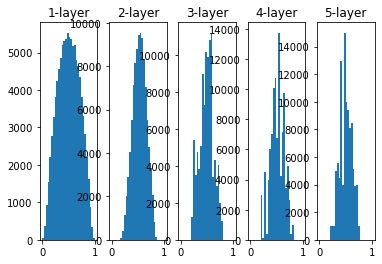

In [12]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(), 30, range = (0, 1))
plt.show()

# 6.4 바른 학습을 위해
---

### 6.4.1 오버피팅
---

In [22]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True)
# 오버피팅 재현하기 위해서 학습 데이터 수를 줄인다
x_train = x_train[:300]
t_train = t_train[:300]

In [25]:
network = MultiLayerNet(input_size = 784, hidden_size_list = [100,100,100,100,100,100], output_size = 10)
optimizer = SGD(lr = 0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(10000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads =  network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0 :
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt+= 1
        if epoch_cnt >= max_epochs:
            break

### 6.4.3 드롭아웃
---

In [27]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x.shape)>self.dropout_ration
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

# 6.5 적절한 하이퍼파라미터 값 찾기
---

### 6.5.1 검증 데이터
---


In [31]:
from common.util import suffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

#훈련 데이터를 셔플
x_train, t_train = shuffle(x_train, t_train)

#20%를 검증 데이터로 분할
validation_rate = 0.2
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

ImportError: cannot import name 'suffle_dataset' from 'common.util' (..\common\util.py)